In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('process_heart.csv')
X=df.drop('target',axis=1)
y=df['target']


#划分训练集和数据集
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

#构架随机森林模型
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=5,n_estimators=100,random_state=5)
model.fit(X_train,y_train)

#在测试集上预测
y_predict=model.predict(X_test)


Bad key text.latex.preview in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\阿超\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is save

In [2]:
#定性预测结果
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [3]:
#定量预测结果
y_pred_proba=model.predict_proba(X_test)

In [4]:
y_pred_proba

array([[0.90341673, 0.09658327],
       [0.65146111, 0.34853889],
       [0.62338459, 0.37661541],
       [0.23269383, 0.76730617],
       [0.70921534, 0.29078466],
       [0.26094227, 0.73905773],
       [0.38552409, 0.61447591],
       [0.30809576, 0.69190424],
       [0.09118795, 0.90881205],
       [0.84961624, 0.15038376],
       [0.05053297, 0.94946703],
       [0.8352881 , 0.1647119 ],
       [0.41842278, 0.58157722],
       [0.14237312, 0.85762688],
       [0.80799714, 0.19200286],
       [0.16244298, 0.83755702],
       [0.85266735, 0.14733265],
       [0.99465124, 0.00534876],
       [0.3577463 , 0.6422537 ],
       [0.78251753, 0.21748247],
       [0.94602969, 0.05397031],
       [0.15998159, 0.84001841],
       [0.32713839, 0.67286161],
       [0.15047025, 0.84952975],
       [0.66639429, 0.33360571],
       [0.83093808, 0.16906192],
       [0.98299287, 0.01700713],
       [0.91402804, 0.08597196],
       [0.06362005, 0.93637995],
       [0.99105795, 0.00894205],
       [0.

In [5]:
y_pred_proba[:,1]>0.5

array([False, False, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True, False, False,  True])

In [6]:
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [7]:
import shap

In [8]:
shap.initjs()

# 计算测试集每个样本的每个特征对两类预测结果的shap值

In [9]:
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_test)

In [10]:
len(shap_values)

2

In [11]:
#61个样本。26个特征，对不患病预测结果的shap值
shap_values[0].shape

(61, 26)

In [12]:
#61个样本。26个特征，对患病预测结果的shap值
shap_values[1].shape

(61, 26)

In [13]:
shap_values[1]

array([[-3.81147152e-03, -2.31476931e-03, -1.55963490e-02, ...,
        -4.37282644e-04, -6.35389388e-02,  4.87063433e-05],
       [-2.97436534e-02,  6.54049722e-03,  5.80768810e-04, ...,
        -9.52034370e-05, -3.94328661e-02,  4.10758301e-05],
       [-7.93543344e-03,  5.31459366e-03, -2.08148750e-02, ...,
         6.41587919e-04, -5.20560497e-02,  6.66834546e-05],
       ...,
       [ 7.64621903e-03, -2.11674934e-03, -5.32025148e-03, ...,
         2.46911844e-04, -4.65644860e-02,  4.87063433e-05],
       [-1.07746293e-02, -2.79478714e-03,  1.99187819e-02, ...,
         4.82900804e-04, -5.13059409e-02,  4.87063433e-05],
       [ 1.38265241e-02, -5.23485833e-03,  1.98212630e-02, ...,
         2.35478472e-04, -6.78512612e-02,  8.15601239e-05]])

In [14]:
#测试集所有样本，预测为不患病和患病各自的平均概率
explainer.expected_value

array([0.42483471, 0.57516529])

In [15]:
explainer.expected_value[0]+explainer.expected_value[1]

1.0

## 对于某个样本，模型预测为患病的概率为 测试集患病的平均概率与该样本各特征对患病预测结果的shap值和

In [16]:
shap_values[1].shape

(61, 26)

In [17]:
shap_values[1].sum(axis=1).shape

(61,)

In [18]:
y_pred_proba_shap=shap_values[1].sum(axis=1)+explainer.expected_value[1]

In [19]:
y_pred_proba_shap

array([0.09658327, 0.34853889, 0.37661541, 0.76730617, 0.29078466,
       0.73905773, 0.61447591, 0.69190424, 0.90881205, 0.15038376,
       0.94946703, 0.1647119 , 0.58157722, 0.85762688, 0.19200286,
       0.83755702, 0.14733265, 0.00534876, 0.6422537 , 0.21748247,
       0.05397031, 0.84001841, 0.67286161, 0.84952975, 0.33360571,
       0.16906192, 0.01700713, 0.08597196, 0.93637995, 0.00894205,
       0.88259287, 0.22144779, 0.13248655, 0.239255  , 0.01086784,
       0.15102024, 0.78254475, 0.47799826, 0.83752573, 0.23052511,
       0.05459283, 0.24579854, 0.8381698 , 0.47594948, 0.91317222,
       0.41565467, 0.55691391, 0.83827165, 0.76533519, 0.31781531,
       0.51642864, 0.79624746, 0.03746243, 0.1343905 , 0.94325165,
       0.80906036, 0.81015064, 0.74362487, 0.01192906, 0.04612857,
       0.68257933])

# 特征重要度
### 对于某个特征，计算测试集每个病人的该特征shap值和，shap值越高，特征越重要

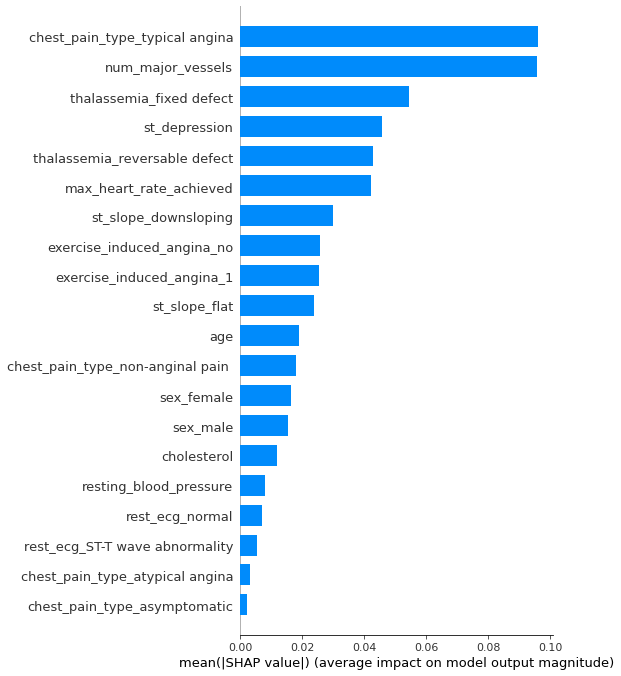

In [20]:
shap.summary_plot(shap_values[1],X_test,plot_type='bar')

# 各特征数值大小与各特征shap值关系图

### 每一行表示一个特征，红色表示该特征的值较高的数据点，蓝色值表示该特征的值较低的数据点。越靠右表示这个特征对预测为患病的正向影响越高

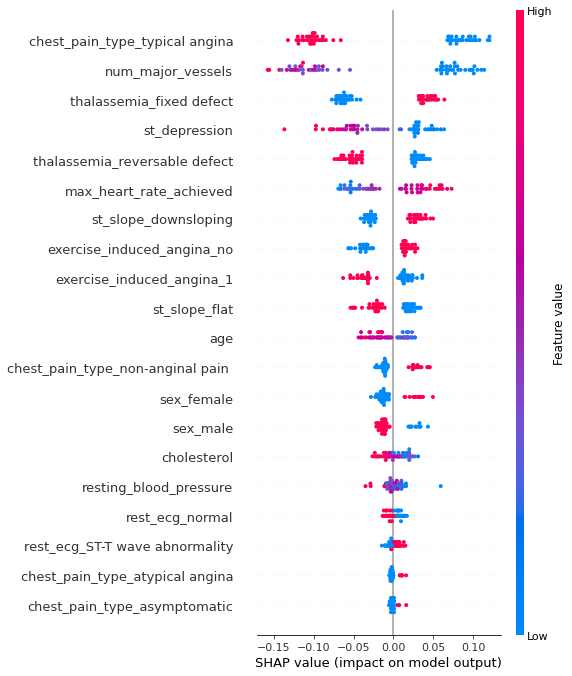

In [21]:
shap.summary_plot(shap_values[1],X_test)

# 分析单个样本各特征对预测为患病结果的影响

In [22]:
#选取测试集中索引号为126的病人
idx=126
patient=X.iloc[idx,:]

In [23]:
patient

age                                           47.0
resting_blood_pressure                       112.0
cholesterol                                  204.0
max_heart_rate_achieved                      143.0
st_depression                                  0.1
num_major_vessels                              0.0
sex_female                                     0.0
sex_male                                       1.0
chest_pain_type_asymptomatic                   0.0
chest_pain_type_atypical angina                0.0
chest_pain_type_non-anginal pain               0.0
chest_pain_type_typical angina                 1.0
fasting_blood_sugar_greater than 120mg/ml      0.0
fasting_blood_sugar_lower than 120mg/ml        1.0
rest_ecg_ST-T wave abnormality                 1.0
rest_ecg_left ventricular hypertrophy          0.0
rest_ecg_normal                                0.0
exercise_induced_angina_1                      0.0
exercise_induced_angina_no                     1.0
st_slope_downsloping           

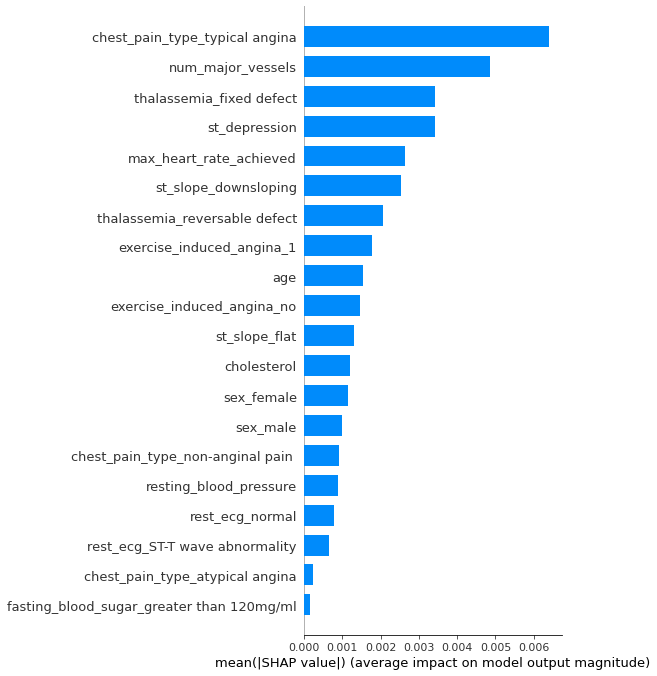

In [24]:
shap_interaction_values=explainer.shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values[1][3],X_test,plot_type='bar')

In [25]:
shap_values_patient=explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1],shap_values_patient[1],patient)

# 测试集中所有样本的summary plot
###  将测试集中所有样本的force plot旋转九十度拼接在一起，形成 summary plot ，可以在下拉菜单选择按照相似性聚类展示，按照预测结果概率从大到小展示，按照测试集原本样本顺序，按照某个特征分别展示

In [26]:
number_show =60
shap_values_summary=explainer.shap_values(X_train.iloc[:number_show])
shap.force_plot(explainer.expected_value[1],shap_values_summary[1],X_test.iloc[:number_show])

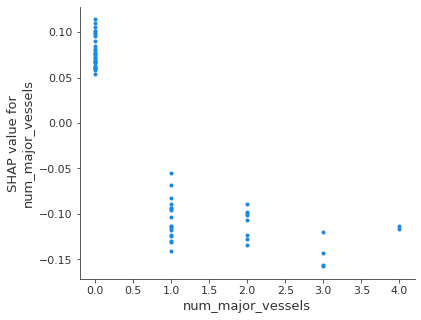

In [27]:
#展示某个特征从小变大时对预测结果的shap值 心脏大血管个数
shap.dependence_plot('num_major_vessels',shap_values[1],X_test,interaction_index=None)

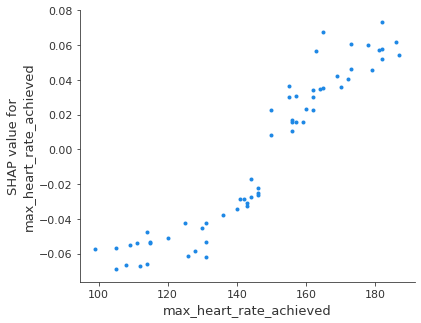

In [52]:
shap.dependence_plot('max_heart_rate_achieved',shap_values[1],X_test,interaction_index=None)

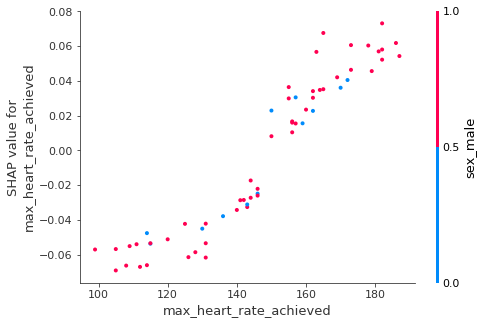

In [29]:
shap.dependence_plot('max_heart_rate_achieved',shap_values[1],X_test,interaction_index='sex_male')

# shap 决策图

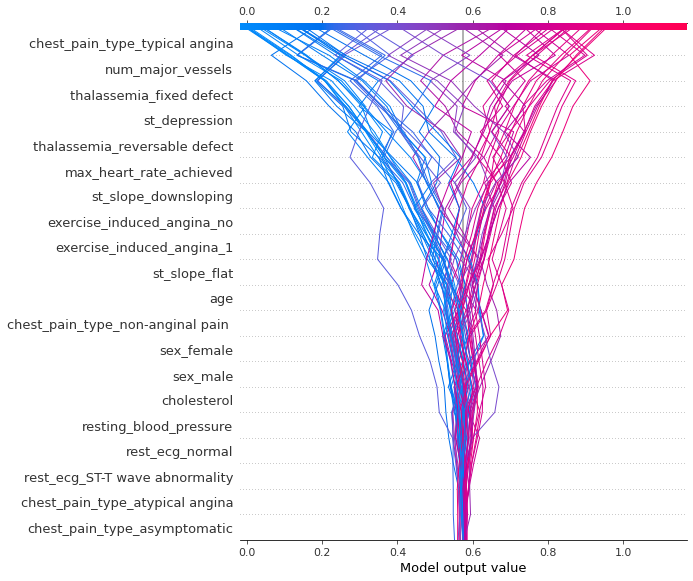

In [30]:
expected_value=explainer.expected_value
shap.decision_plot(expected_value[1],shap_values[1],X_test)

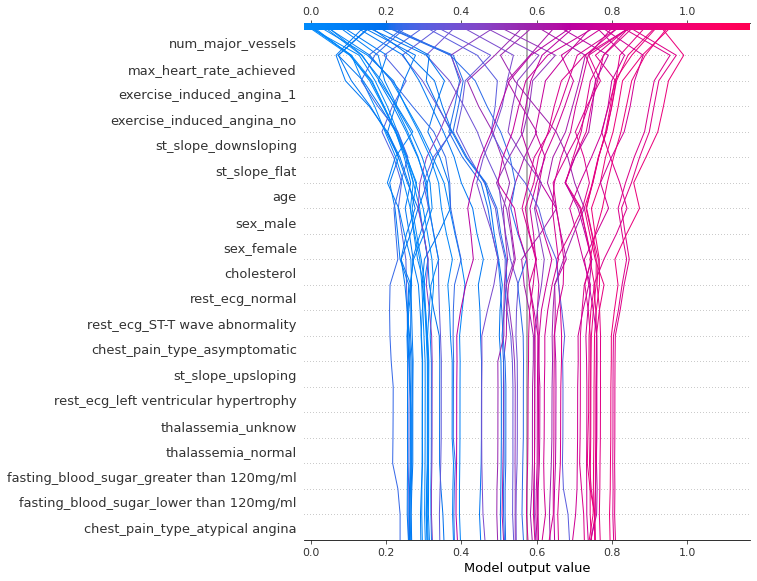

In [31]:
# 查看典型决策路径与异常点
shap.decision_plot(expected_value[1],shap_values[1],X_test,feature_order='hclust')

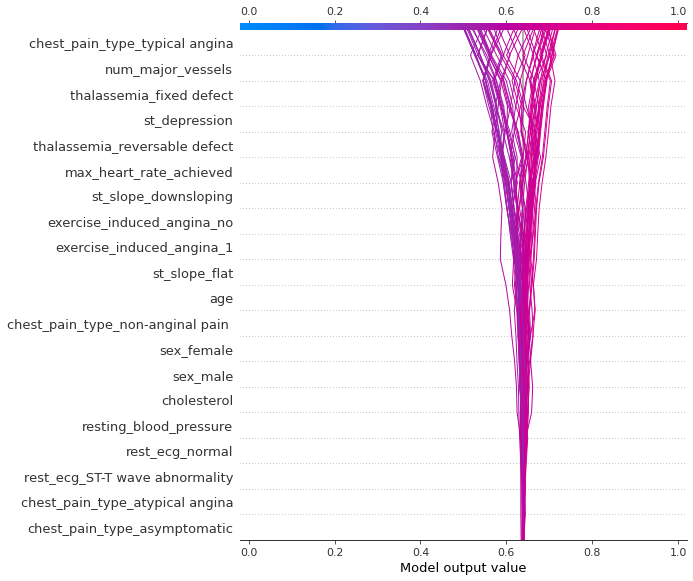

In [32]:
#进行对数几率缩放变化
shap.decision_plot(expected_value[1],shap_values[1],X_test,link='logit')

# 绘制单个样本的决策图

索引号为24的样本，在原始数据集X中的索引号为202


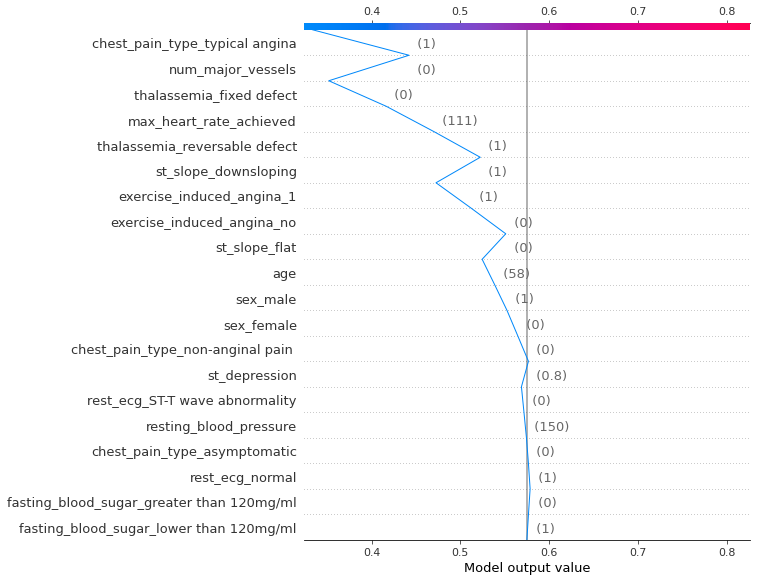

In [33]:
idx=24
feature_idx=[i for i in range(26)]
selction=np.zeros((61))
selction[idx]=1
selction=selction>0
print('索引号为{}的样本，在原始数据集X中的索引号为{}'.format(idx,X_test.iloc[idx:idx+1].index[0]))
shap.decision_plot(expected_value[1],shap_values[1][selction],X_test[selction])#feature_order=feature_idx

# 在决策图中显示测试集中模型预测错误的样本

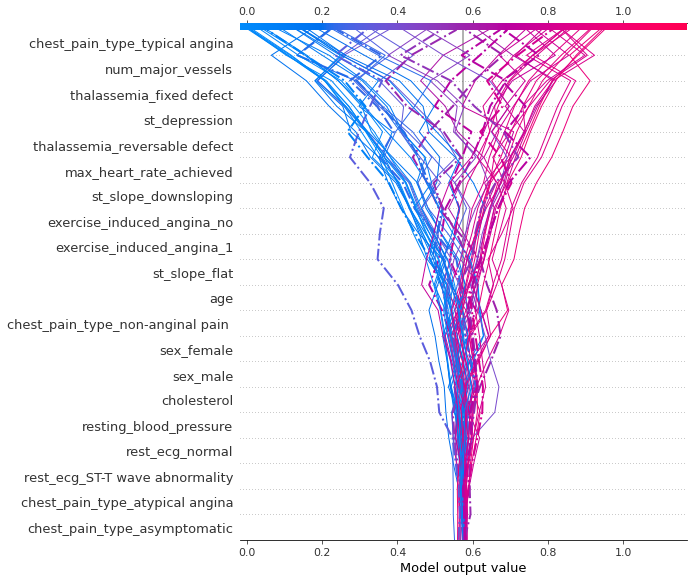

In [34]:
misclassified=y_predict!=y_test
misclassified_df=pd.DataFrame({'是否预测错误':misclassified})
shap.decision_plot(expected_value[1],shap_values[1],X_test,highlight=misclassified)

In [35]:
misclassified_df

,是否预测错误
246,False
183,False
229,False
126,False
184,False
...,...
277,True
121,False
187,False
301,False


In [36]:
misclassified_df=misclassified_df[misclassified_df['是否预测错误']==True]

In [37]:
misclassified_df

,是否预测错误
194,True
296,True
139,True
287,True
52,True
138,True
259,True
106,True
173,True
277,True


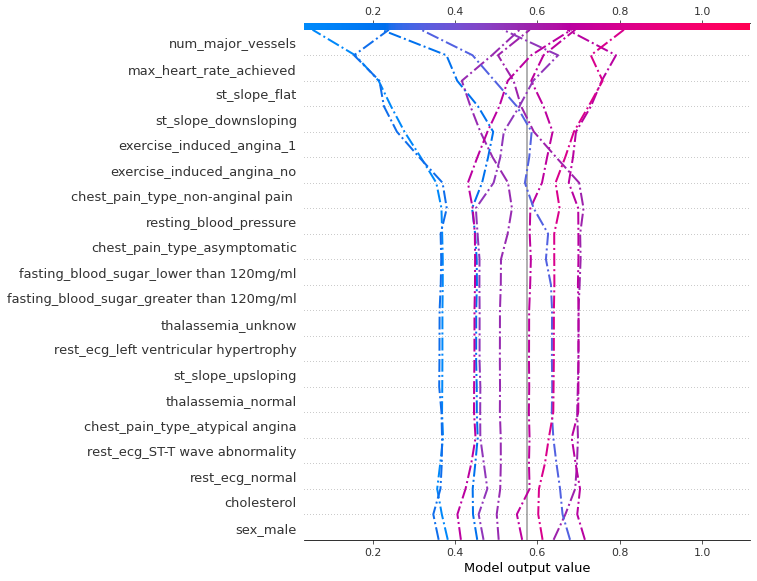

In [38]:
#提取出分类错误的查看是否具有相似特征(红线表示没患病的被模型预测为患病，蓝线表示患病被模型预测为不患病)
shap.decision_plot(expected_value[1],shap_values[1][misclassified],X_test[misclassified],highlight=range(len(misclassified_df)),feature_order='hclust')

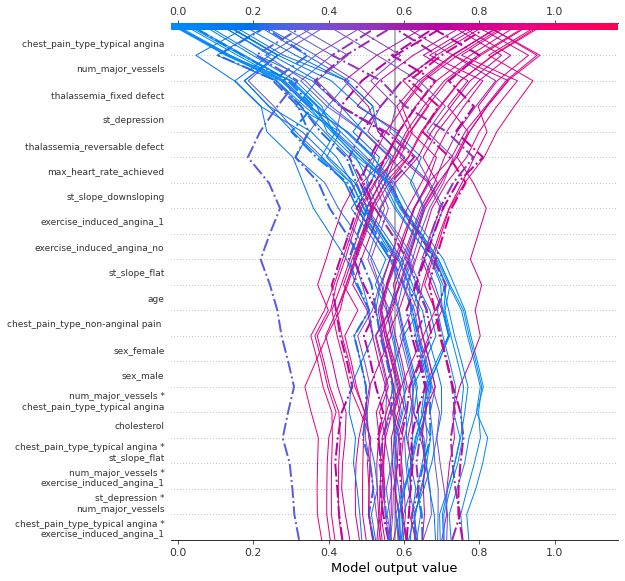

In [39]:
#两两交互特征决策图
shap.decision_plot(expected_value[1],shap_interaction_values[1],X_test,highlight=misclassified)

# 考虑某个病人某个特征变化对模型分类结果 的影响

In [40]:
idx=25
X_test.iloc[idx]

age                                           70.0
resting_blood_pressure                       160.0
cholesterol                                  269.0
max_heart_rate_achieved                      112.0
st_depression                                  2.9
num_major_vessels                              1.0
sex_female                                     0.0
sex_male                                       1.0
chest_pain_type_asymptomatic                   0.0
chest_pain_type_atypical angina                0.0
chest_pain_type_non-anginal pain               1.0
chest_pain_type_typical angina                 0.0
fasting_blood_sugar_greater than 120mg/ml      0.0
fasting_blood_sugar_lower than 120mg/ml        1.0
rest_ecg_ST-T wave abnormality                 1.0
rest_ecg_left ventricular hypertrophy          0.0
rest_ecg_normal                                0.0
exercise_induced_angina_1                      1.0
exercise_induced_angina_no                     0.0
st_slope_downsloping           

In [41]:
print('索引号为{}的样本，在原始数据集X中的索引号为{}'.format(idx,X_test.iloc[idx:idx+1].index[0]))

索引号为25的样本，在原始数据集X中的索引号为240


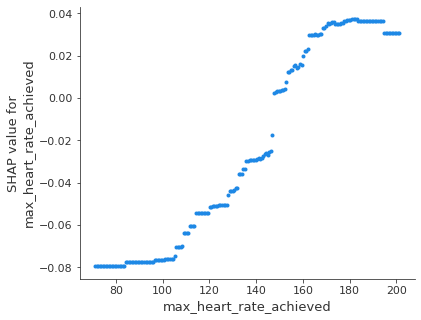

In [42]:
feature_selected='max_heart_rate_achieved'
sep=200
feature_selected_min=X[feature_selected].min()
feature_selected_max=X[feature_selected].max()
step=(feature_selected_max-feature_selected_min)/sep
rg=np.arange(feature_selected_min,feature_selected_max,step)
R=X.iloc[np.repeat(idx,len(rg))].reset_index(drop=True)
R[feature_selected]=rg
hypothetical_shap_values=explainer.shap_values(R)[1]
shap.dependence_plot(feature_selected,hypothetical_shap_values,R,interaction_index=None)

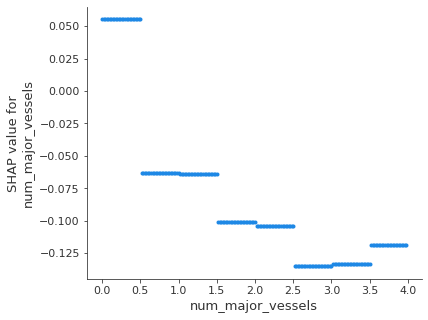

In [43]:
feature_selected='num_major_vessels'
sep=200
feature_selected_min=X[feature_selected].min()
feature_selected_max=X[feature_selected].max()
step=(feature_selected_max-feature_selected_min)/sep
rg=np.arange(feature_selected_min,feature_selected_max,step)
R=X.iloc[np.repeat(idx,len(rg))].reset_index(drop=True)
R[feature_selected]=rg
hypothetical_shap_values=explainer.shap_values(R)[1]
shap.dependence_plot(feature_selected,hypothetical_shap_values,R,interaction_index=None)

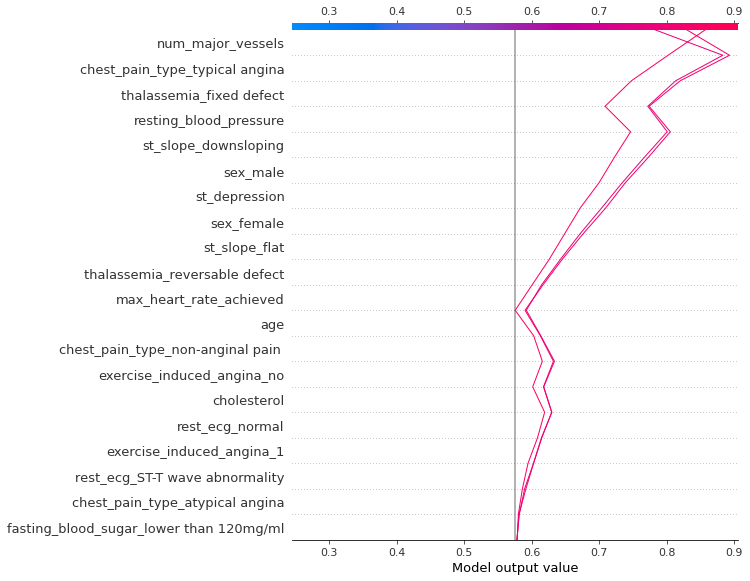

In [44]:
#绘制决策图
hypothetical_shap_values.shape
idx=25
shap.decision_plot(expected_value[1],hypothetical_shap_values[[0,50,99]],X_test.iloc[idx],feature_order='importance')#feature_order=feature_idx

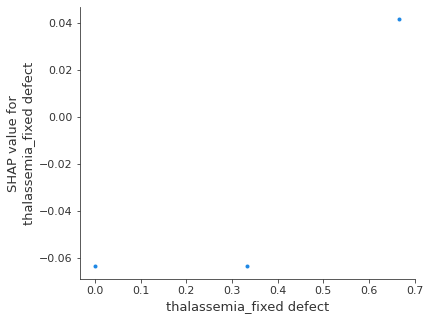

In [45]:
#地中海贫血症
feature_selected='thalassemia_fixed defect'
sep=3
feature_selected_min=X[feature_selected].min()
feature_selected_max=X[feature_selected].max()
step=(feature_selected_max-feature_selected_min)/sep
rg=np.arange(feature_selected_min,feature_selected_max,step)
R=X.iloc[np.repeat(idx,len(rg))].reset_index(drop=True)
R[feature_selected]=rg
hypothetical_shap_values=explainer.shap_values(R)[1]
shap.dependence_plot(feature_selected,hypothetical_shap_values,R,interaction_index=None)

# 找出受st_depression特征影响最大的病人

In [46]:
X_test['st_depression'].unique()

array([1.9, 2.5, 1.8, 0.1, 2.6, 3.5, 0. , 3. , 2. , 1. , 3.4, 1.4, 0.2,
       1.6, 0.8, 2.9, 2.2, 3.6, 1.5, 2.8, 0.4, 3.1, 0.6, 3.8, 3.2, 2.1,
       1.2, 0.3])

In [47]:
idx=np.argpartition(shap_values[1][:,X_test.columns.get_loc('st_depression')],2)

In [48]:
idx.shape

(61,)

In [49]:
idx

array([ 5, 46,  7,  3,  4,  0,  6,  2,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,  1, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

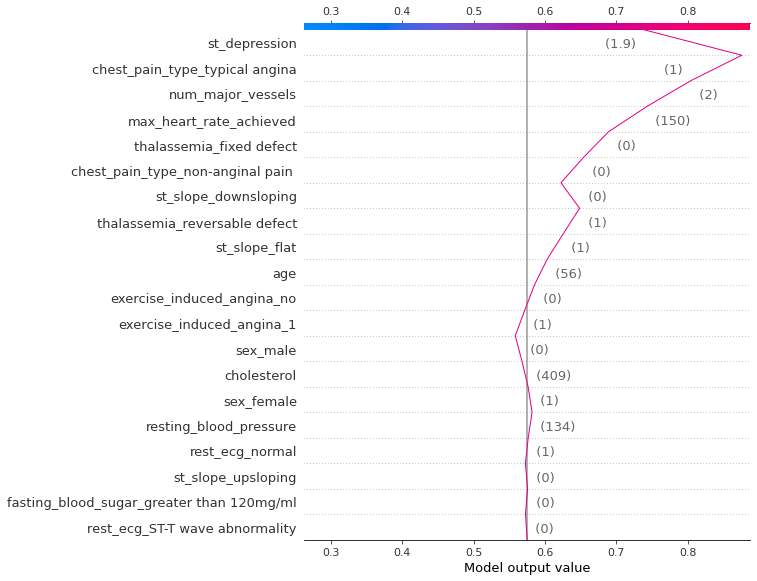

In [50]:
#5号病人的决策
shap.decision_plot(expected_value[1],shap_values[1][5],X_test,feature_order='importance')

# 找出受max_heart_rate_achieved特征影响最大的病人

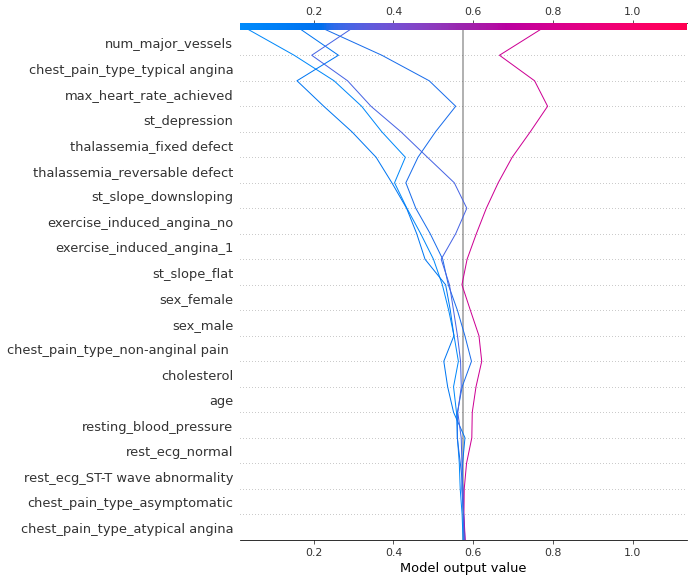

In [51]:
feature='max_heart_rate_achieved'
num_show=5
idx=np.argpartition(shap_values[1][:,X_test.columns.get_loc(feature)],2)
shap.decision_plot(expected_value[1],shap_values[1][idx[0:num_show]],X_test,feature_order='importance')